# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [3]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

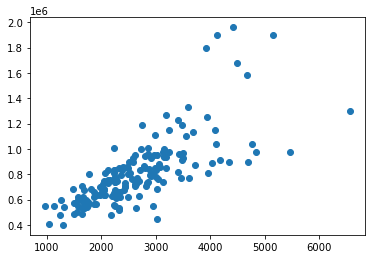

In [4]:
y = df[df['zipcode'] == 98005]['price']
x = df[df['zipcode'] == 98005]['sqft_living']

plt.scatter(x, y)

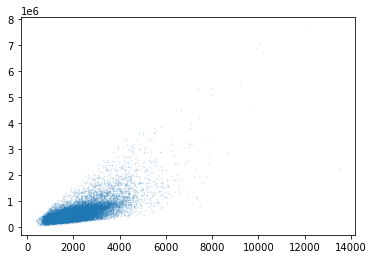

In [5]:
# sqft_living
# price

x = df['sqft_living']
y = df['price']

plt.scatter(x, y, alpha = .15, s= .4)

In [6]:
df[df['zipcode'] == 98005].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.293229,0.602608,0.740920,0.566596,0.435987,0.777308,0.427175,0.098636,NaN,0.529695,0.198970,0.674625,0.397516
bedrooms,0.293229,1.000000,0.362850,0.545460,0.299922,0.084771,0.302207,0.026695,-0.081983,NaN,0.218388,0.143646,0.275105,0.222452
bathrooms,0.602608,0.362850,1.000000,0.716835,0.383228,0.478232,0.620989,0.550833,0.041331,NaN,0.387685,0.226978,0.536440,0.345951
sqft_living,0.740920,0.545460,0.716835,1.000000,0.510779,0.426776,0.786090,0.401876,0.004121,NaN,0.499581,0.185618,0.658809,0.403712
sqft_lot,0.566596,0.299922,0.383228,0.510779,1.000000,0.321917,0.504037,0.166455,-0.013749,NaN,0.611847,0.283477,0.600156,0.619629
floors,0.435987,0.084771,0.478232,0.426776,0.321917,1.000000,0.652533,0.620710,-0.102883,NaN,0.388322,0.342794,0.418034,0.221950
sqft_above,0.777308,0.302207,0.620989,0.786090,0.504037,0.652533,1.000000,0.454368,0.079430,NaN,0.546579,0.259574,0.696711,0.399360
yr_built,0.427175,0.026695,0.550833,0.401876,0.166455,0.620710,0.454368,1.000000,-0.211315,NaN,0.238243,0.361009,0.318313,0.161520
yr_renovated,0.098636,-0.081983,0.041331,0.004121,-0.013749,-0.102883,0.079430,-0.211315,1.000000,NaN,0.040105,-0.041954,-0.081255,0.020770
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

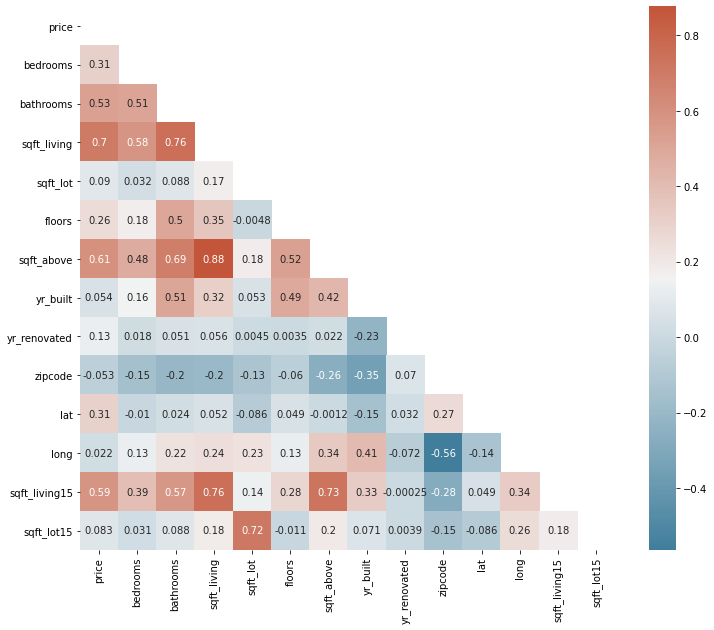

In [7]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

<AxesSubplot:>

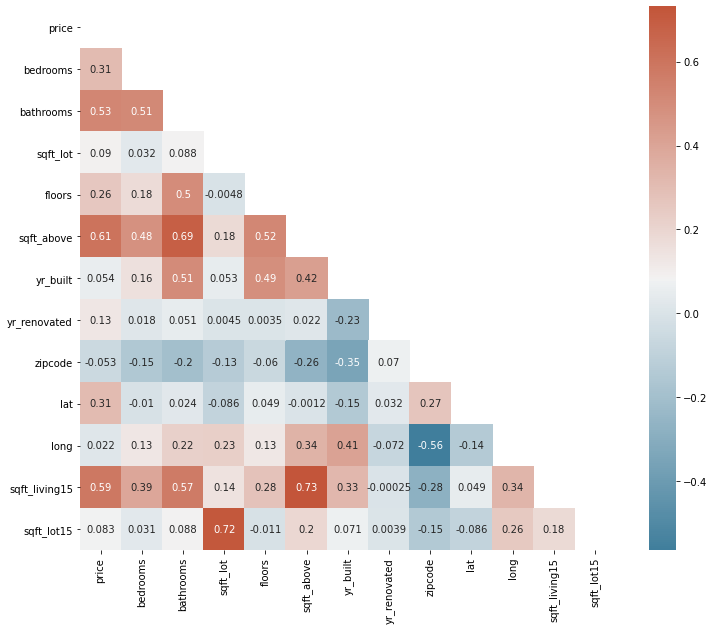

In [8]:
heat2 = df.drop('sqft_living', axis=1).corr()
f, ax = plt.subplots(figsize=(12, 10))
mask2 = np.triu(np.ones_like(heat2, dtype=bool))
sns.heatmap(heat2, annot=True, mask=mask2, cmap=cmap)

In [9]:
zipcodes = pd.get_dummies(df.zipcode)
zip_cat = pd.concat([df, zipcodes], axis=1)

In [10]:
zip_price = pd.concat([df.price, df.sqft_living, zipcodes], axis=1) #grade_labels[0].astype('int64')

# y = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].price
# x = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].sqft_living

# plt.scatter(x, y)
# grade_set = list(set(zip_price[0]))

# zip_price[(zip_price[0] == 7) & (zip_price[98001] == 1)]

# x2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].sqft_living
# y2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].price

# plt.scatter(x2, y2)

y3 = zip_price.price
x3 = zip_price.drop('price', axis=1)

lr = LinearRegression()

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=.2)

lr.fit(x3_train, y3_train)

lr.score(x3_test, y3_test) # ~.75 

# try making the grade categorical

grade_cat = zip_price#.drop(0, axis=1)
grade_cat = pd.concat([grade_cat, pd.get_dummies(df.grade)], axis=1)

y4 = grade_cat.price
x4 = grade_cat.drop('price', axis=1)

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

lr.fit(x4_train, y4_train)

lr.score(x4_test, y4_test) # ~.77

grade_cat

price = y4_train
preds = x4_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

# lr.predict()
# grade_cat

y5 = grade_cat.price
x5 = grade_cat.drop('price', axis=1)

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

lr.fit(x4_train, y4_train)

price = y5_train
preds = x5_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

NameError: name 'y5_train' is not defined

In [11]:
y6 = zip_cat.price
x6 = zip_cat.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15'], axis=1)

x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=.2)

lr.fit(x6_train, y6_train)

price = y6_train
preds = x6_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

# lr.score(x6_test, y6_test)

# bed + bath + zip + sqft ~.74
# x6.columns

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     678.1
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:29:55   Log-Likelihood:            -2.3419e+05
No. Observations:               17277   AIC:                         4.685e+05
Df Residuals:                   17204   BIC:                         4.691e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -4.418e+04   1923.647    -22.964      0.000   -4.79e+04   -4.04e+04
bathrooms    1.022e+04   2936.636      3.479      0.001    4459.148     1.6e+04
sqft_living   272.2338      2.661    102.315      0.000     267.018     277.449
98001       -1.096e+05   1.23e+04     -8.878      0.000   -1.34e+05   -8.54e+04
98002       -8.648e+04   1.65e+04     -5.250      0.000   -1.19e+05   -5.42e+04
98003        -9.89e+04   1.39e+04     -7.118      0.000   -1.26e+05   -7.17e+04
98004         7.01e+05   1.33e+04     52.578      0.000    6.75e+05    7.27e+05
98005        2.261e+05   1.75e+04     12.885      0.000    1.92e+05    2.61e+05
98006        2.188e+05   1.14e+04     19.158      0.000    1.96e+05    2.41e+05
98007        1.672e+05   1.82e+04      9.186      0.000    1.32e+05    2.03e+05
98008        2.087e+05   1.38e+04     15.168      0.000    1.82e+05    2.36e+05
98010       -3.395e+04   2.11e+04     -1.609      0.108   -7.53e+04    7410.205
98011        1.662e+04   1.62e+04      1.024      0.306   -1.52e+04    4.84e+04
98014       -8126.1601   1.98e+04     -0.411      0.681   -4.69e+04    3.06e+04
98019       -4.516e+04    1.6e+04     -2.822      0.005   -7.65e+04   -1.38e+04
98022       -6.486e+04   1.47e+04     -4.413      0.000   -9.37e+04   -3.61e+04
98023       -1.246e+05    1.1e+04    -11.321      0.000   -1.46e+05   -1.03e+05
98024        7.316e+04   2.35e+04      3.109      0.002     2.7e+04    1.19e+05
98027        6.556e+04    1.2e+04      5.456      0.000     4.2e+04    8.91e+04
98028        1.736e+04   1.38e+04      1.254      0.210   -9777.676    4.45e+04
98029        1.156e+05   1.34e+04      8.619      0.000    8.93e+04    1.42e+05
98030       -1.054e+05   1.42e+04     -7.403      0.000   -1.33e+05   -7.75e+04
98031       -9.111e+04   1.42e+04     -6.420      0.000   -1.19e+05   -6.33e+04
98032       -9.244e+04      2e+04     -4.628      0.000   -1.32e+05   -5.33e+04
98033         2.76e+05   1.17e+04     23.551      0.000    2.53e+05    2.99e+05
98034        1.037e+05   1.07e+04      9.725      0.000    8.28e+04    1.25e+05
98038       -8.456e+04   1.06e+04     -7.964      0.000   -1.05e+05   -6.37e+04
98039        1.235e+06   2.98e+04     41.404      0.000    1.18e+06    1.29e+06
98040        4.971e+05    1.4e+04     35.407      0.000     4.7e+05    5.25e+05
98042       -1.019e+05   1.06e+04     -9.642      0.000   -1.23e+05   -8.12e+04
98045        3566.8869   1.53e+04      0.234      0.815   -2.63e+04    3.35e+04
98052        1.354e+05   1.07e+04     12.602      0.000    1.14e+05    1.56e+05
98053        8.057e+04   1.19e+04      6.766      0.000    5.72e+04    1.04e+05
98055       -6.254e+04   1.39e+04     -4.485      0.000   -8.99e+04   -3.52e+04
98056        4162.4795   1.18e+04      0.354      0.724   -1.89e+04    2.72e+04
98058       -6.893e+04   1.14e+04     -6.02

In [17]:
np.random.seed(42)
sample_pt = zip_cat.sample(1)
sample_pt_price = zip_cat.iloc[0,1]
sample = sample_pt.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15'], axis=1)

# Show my random sample off
print(f'Price of sample: ${sample_pt_price}')
sample

Price of sample: $221900.0


,bedrooms,bathrooms,sqft_living,98001,98002,98003,98004,98005,98006,98007,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
id,,,,,,,,,,,,,,,,,,,,,
6303401050,3,0.75,850,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        y_hat = lr7.predict(x7_test)
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

In [62]:
#x axis actual prices, y axis normalize predictions
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()
    
    x_axis = [] # actual price
    y_axis = [] # % error

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        
        y_hat = lr7.predict(x7_test)
        
        x_axis.append(y7_test)
        y_axis.append((y_hat-y7_test)/y7_test)# predicted price - acutal price / actual price
        
        plt.scatter(x_axis, y_axis, s=.1, alpha=.2)
        plt.xlim(0,1000000)
        plt.ylim(-1, 1)
        
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

([180053.70280195205,
  198791.5860738617,
  178719.33159310167,
  193878.94320384576,
  181351.80665784192],
 [0.7462519881156608,
  0.7445479579193511,
  0.7457573763437739,
  0.7349560555648931,
  0.7637269778296936],
 [145151.65234375,
  141978.2109375,
  144509.171875,
  149181.05859375,
  146726.45703125])

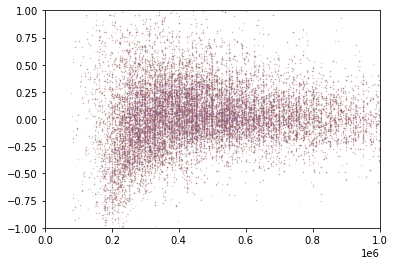

In [63]:
train_lr_randomly(data=zip_cat,sample_pt=sample, ntimes=5)

In [65]:
zip_cat.price.median()

450000.0

In [49]:
y7 = zip_cat.price
x7 = zip_cat.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)


linreg = LinearRegression()
linreg.fit(x7_train, y7_train)
y_hat_train = linreg.predict(x7_train)
y_hat_test = linreg.predict(x7_test)
train_res = y_hat_train - y7_train
test_res = y_hat_test - y7_test
mse_train = mean_squared_error(y7_train, y_hat_train)
mse_test = mean_squared_error(y7_test, y_hat_test)
print(np.sqrt(mse_train))
print(np.sqrt(mse_test))

187512.55549101104
189928.8473237084


In [ ]:
def price_predictor():
    beds = int(input('How many bedrooms?'))
    baths = int(input('How many bathrooms?'))
    sqft = int(input('How many square feet?'))
    zip_ = int(input('What is the zipcode?'))
    
    entry = pd.DataFrame(0, index=['sample'], columns=x6.columns)
    entry['bedrooms'] = beds
    entry['bathrooms'] = baths
    entry['sqft_living'] = sqft
    entry[zip_] = 1
    
    price_target = f'${round(float(lr.predict(entry)), 2)}'
    return price_target

price_predictor()


In [ ]:
y = trimmed.price
X = trimmed.drop('price', axis=1)

trimmed.columns # sqft + zipcode

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:
model.score(X,y)

In [ ]:
x_var = df[['sqft_living']] # grade
y_var = df.price

X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=.2)

In [ ]:
model.fit(X_train,y_train)
model.score(X_test, y_test) # training = 0.49938431424133234

# USE LABEL ENCODING FOR GRADE

In [ ]:
le = LabelEncoder()

# seperate value for grade

grade_labels = df.grade.str.split(' ', 1, expand=True)
new_df = pd.concat([df.price, df.sqft_living, df.zipcode.astype('object'), grade_labels[0].astype('int64')], axis=1)

x = new_df.drop('price', axis=1)
y = new_df.price

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

model.fit(X_train,y_train)
model.score(X_test, y_test)

model.coef_

In [ ]:
# sss = new_df.reset_index().drop('id', axis=1)

In [ ]:
new_df.groupby('zipcode').count()

In [ ]:
plt.scatter(df.long, df.lat, s=1)